## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [91]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)


In [92]:
df.head()
df[['TV','radio','newspaper']]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
6,8.7,48.9,75.0
7,57.5,32.8,23.5
8,120.2,19.6,11.6
9,8.6,2.1,1.0
10,199.8,2.6,21.2



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

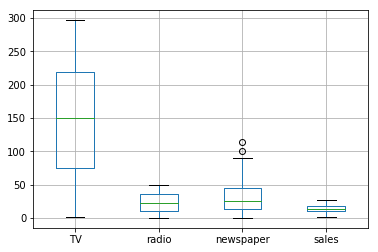

In [93]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [94]:
#plt.scatter(Fill_this_in)

D:\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


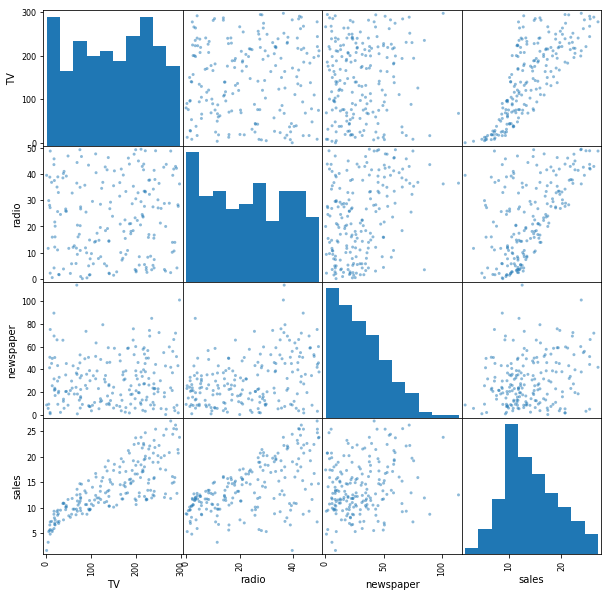

In [95]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10)) #data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

Answer:
There is a correlation of Radio and Tv with Sales. There is no correlation amongst newspaper, tv and radio. In TV vs sales the correlation is positive and in Radio vs Sales the correlation is medium. We can tell that from the distribution of scatter points or by calling correlation between features and sales. (see below)

In [96]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


These values prove the statement above. Correlation between newspaper and sales is very less to be considered.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

a) Set y to be the sales in df

In [98]:
y = df['sales']

b) Set X to be just the features described above in df

In [99]:
X = df[['TV','radio','newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


c) Randomly split data into training and testing - 80% training, 20% testing.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#assigned a randon state to have same set each time

d) Train model on training data, and make predictions on testing data

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
LiRe = LinearRegression()
LiRe.fit(X_train, y_train)
y_pred = LiRe.predict(X_test)

In [103]:
# The coefficients
print('Coefficients: \n', LiRe.coef_)
# RMSV
print("Root Mean Squared Error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.04472952  0.18919505  0.00276111]
Root Mean Squared Error: 3.17
Variance score: 0.90


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [61]:
print('R^2 Score: %.2f' % LiRe.score(X_test, y_test))

R^2 Score: 0.90


We have a score of 0.9 It is a good score that tells us about 90% of the variance in our model!

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

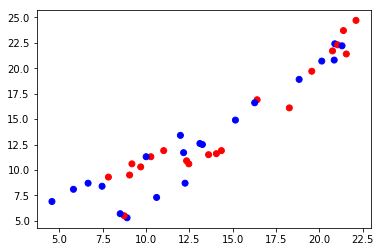

In [104]:
plt.scatter(y_pred,y_test,color=["red","blue"])
plt.show()

Red = Predicted values ; Blue = Actual values
The model looks good and is almost linear! Predicted values are very close to the actualy points.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Co-efficients: 
 [ 0.04472952  0.18919505  0.00276111]


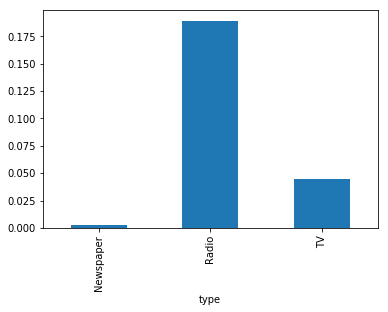

In [106]:
LiRe.coef_
print('Co-efficients: \n', LiRe.coef_)
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':LiRe.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')


We should check if we have normalized the data so that we reduce redundancy. Each feature has its own scale of score and hence should be standardized.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

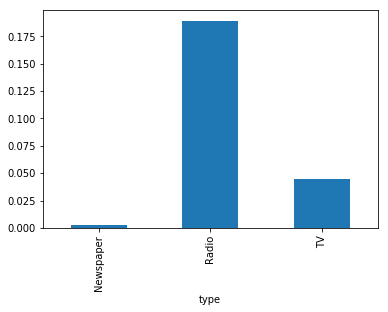

In [107]:
LiRe.coef_
df = pd.DataFrame({'type':['TV','Radio','Newspaper'], 'coef':LiRe.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')

We should normalize the data to have a common scale of comparison.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

We are over estimating our TV and radio sales and need to introduce a non linear term


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

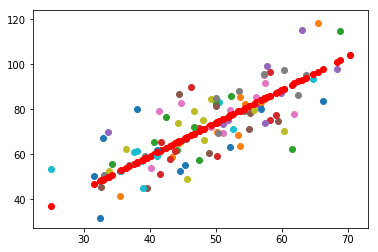

In [118]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("D:\Software\GitHub\APMAE4990-\data\data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    'Starting gradient descent at b = {0}, m = {1}, error = {2}'.format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    'After {0} iterations b = {1}, m = {2}, error = {3}'.format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

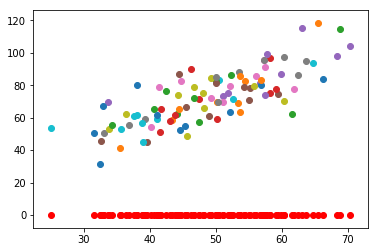

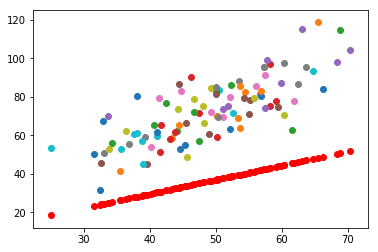

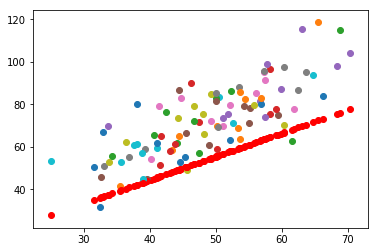

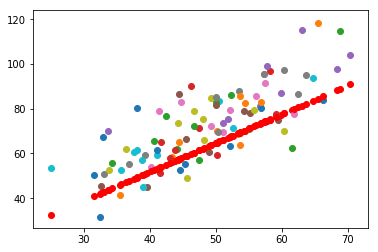

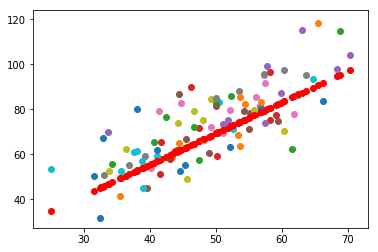

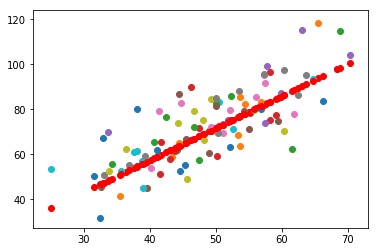

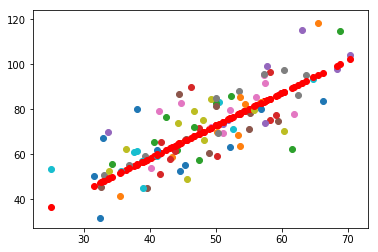

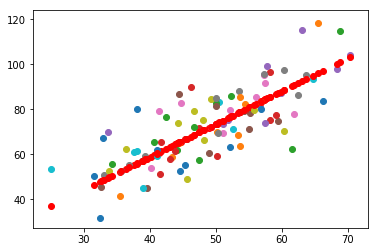

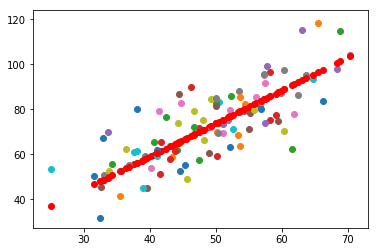

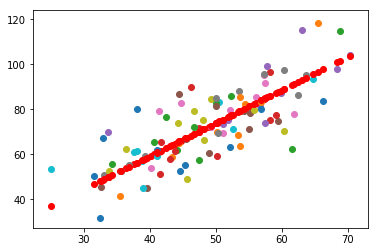

In [119]:


for num in range(0,10):
   run(num)
   plt.show()


For learning rate lower than optimum value, there is convergence, but it takes higher number of iterations to achieve it. For learning rate higher than optimum value, the system does not converge at all and can lead to divergence. But for optimum learning rate, the number of iterations taken to achive convergence is in the optimum range.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

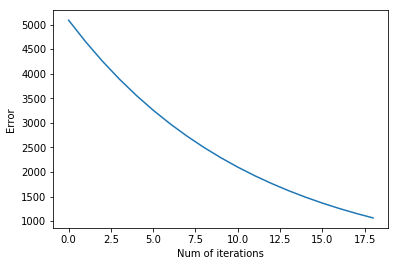

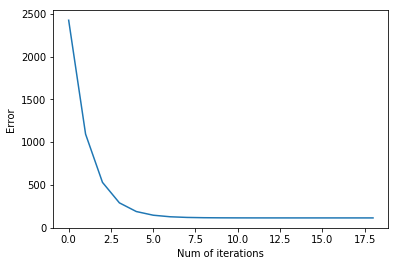

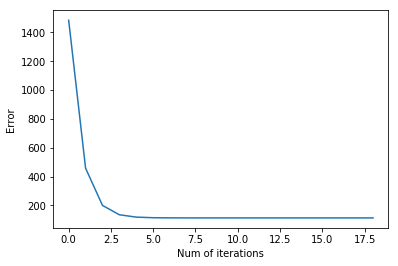

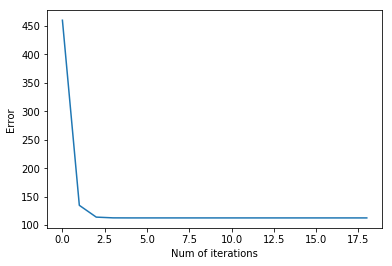

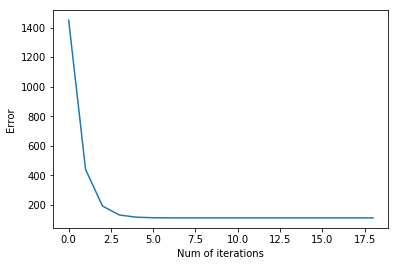

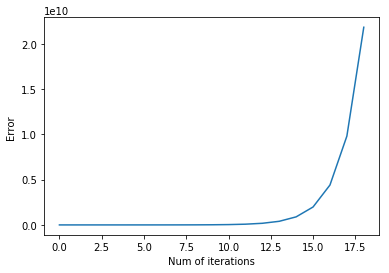

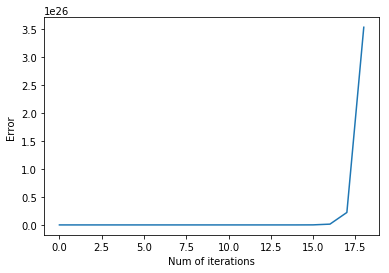

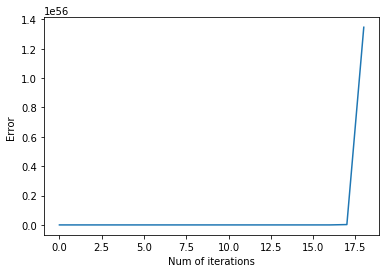

In [120]:
J = [0.000009, 0.00007,0.0001, 0.00015, 0.0003, 0.0005, 0.001, 0.005]
points = genfromtxt("D:\Software\GitHub\APMAE4990-\data\data.csv", delimiter=",")
for l in J:
    errors = []
    for num in range(1,20):
        learning_rate = l
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        num_iterations = num
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        errors.append(compute_error_for_line_given_points(b, m, points))
    plt.figure()
    plt.xlabel('Num of iterations')
    plt.ylabel('Error ')

    plt.plot(errors,label='num_iterations='+str(num_iterations))


I would choose the rate between 0.00015-0.0001 because the errors reach zero in less number of iteration. i.e converges quickly and efficiently!
We can see that for 0.000009 and 0.00007, there is convergence but it takes longer!For rates 0.005 and 0.001, the system doesnt converge!